### Introduction 
-- Multiple data sources
- PM2.5: Particles with an aerodynamic diameter less than  2.5μm
 


In [1]:
import numpy as np
import pandas as pd
import bq_helper
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
open_aq = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="openaq")
open_aq.list_tables()

['global_air_quality']

In [3]:
open_aq.head("global_air_quality")

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Mobile_Cle Elum,037,US,pm25,0.0,2017-09-26 20:00:00+00:00,µg/m³,AirNow,47.197630,-120.958230,1.0
1,Mobile_WhiteSalmon,039,US,pm25,0.0,2017-09-26 20:00:00+00:00,µg/m³,AirNow,45.732414,-121.492330,1.0
2,Mobile_Newport,051,US,pm25,0.0,2017-09-21 18:00:00+00:00,µg/m³,AirNow,48.186485,-117.049160,1.0
3,FR20047,Ain,FR,pm10,22.3,2018-02-26 21:00:00+00:00,µg/m³,EEA France,45.823223,4.953958,1.0
4,FR20047,Ain,FR,no2,7.4,2018-02-26 21:00:00+00:00,µg/m³,EEA France,45.823223,4.953958,1.0


In [4]:
# What ten cities have the most measurements taken there?
query1 = """SELECT city
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'US'
        """
us_cities = open_aq.query_to_pandas_safe(query1)
us_cities.city.value_counts().head(10)

Phoenix-Mesa-Scottsdale                     85
Houston                                     79
Los Angeles-Long Beach-Santa Ana            60
New York-Northern New Jersey-Long Island    57
Riverside-San Bernardino-Ontario            56
San Francisco-Oakland-Fremont               50
Sacramento--Arden-Arcade--Roseville         42
Chicago-Naperville-Joliet                   37
Washington-Arlington-Alexandria             34
Las Vegas-Paradise                          31
Name: city, dtype: int64

In [5]:
# Which U.S. city has the highest pm2.5 value in average?
query2 = """SELECT city, pollutant, AVG(value) AS average_value
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'US' AND pollutant = 'pm25'
            GROUP BY city,pollutant
            ORDER BY average_value DESC
            LIMIT 10
        """
high_pm25_city = open_aq.query_to_pandas_safe(query2)
high_pm25_city

,city,pollutant,average_value
0,IDAHO,pm25,115.033333
1,CLACKAMAS,pm25,59.100000
2,Hanford-Corcoran,pm25,53.000000
3,SAN JOAQUIN,pm25,48.000000
4,SONOMA,pm25,44.000000
5,Fresno,pm25,32.000000
6,MT1,pm25,31.833333
7,Bangor,pm25,31.000000
8,CA8 - ARB,pm25,27.833333
9,Madera,pm25,27.000000


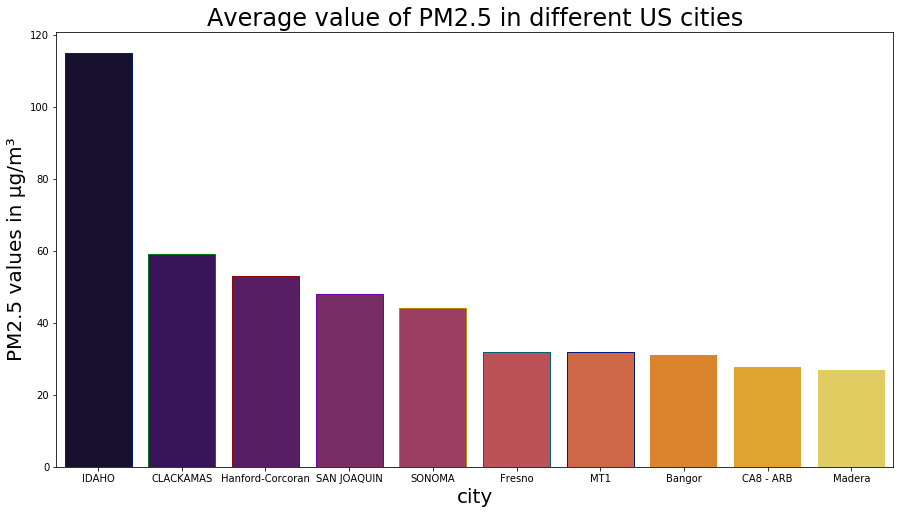

In [6]:
plt.subplots(figsize=(15,8))
sns.barplot(x='city',y='average_value',data=high_pm25_city,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('PM2.5 values in µg/m³', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('city', fontsize=20)
plt.title('Average value of PM2.5 in different US cities', fontsize=24)
plt.show()

In [7]:
hacker_news = bq_helper.BigQueryHelper("bigquery-public-data", "hacker_news")
hacker_news.head("comments")

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [8]:
popular_comments = hacker_news.query_to_pandas_safe("""
    SELECT parent, COUNT(id) AS num_replies
    FROM `bigquery-public-data.hacker_news.comments`
    GROUP BY parent
    HAVING COUNT(id) > 500
    ORDER BY 2 DESC
""")
popular_comments.head()

,parent,num_replies
0,363,1311
1,9812245,902
2,9996333,850
3,9303396,785
4,10152809,733


In [9]:
stories_by_type = hacker_news.query_to_pandas_safe("""
    SELECT type, COUNT(id) AS num_of_type
    FROM `bigquery-public-data.hacker_news.full`
    GROUP BY type
""")
stories_by_type

,type,num_of_type
0,comment,13573980
1,story,2858800
2,pollopt,11826
3,job,10227
4,poll,1729


In [10]:
accidents = bq_helper.BigQueryHelper("bigquery-public-data", "nhtsa_traffic_fatalities")
print(accidents.list_tables())

['accident_2015', 'accident_2016', 'cevent_2015', 'cevent_2016', 'damage_2015', 'damage_2016', 'distract_2015', 'distract_2016', 'drimpair_2015', 'drimpair_2016', 'factor_2015', 'factor_2016', 'maneuver_2015', 'maneuver_2016', 'nmcrash_2015', 'nmcrash_2016', 'nmimpair_2015', 'nmimpair_2016', 'nmprior_2015', 'nmprior_2016', 'parkwork_2015', 'parkwork_2016', 'pbtype_2015', 'pbtype_2016', 'person_2015', 'person_2016', 'safetyeq_2015', 'safetyeq_2016', 'vehicle_2015', 'vehicle_2016', 'vevent_2015', 'vevent_2016', 'vindecode_2015', 'vindecode_2016', 'violatn_2015', 'violatn_2016', 'vision_2015', 'vision_2016', 'vsoe_2015', 'vsoe_2016']


In [11]:
accidents_by_day = accidents.query_to_pandas_safe("""
    SELECT COUNT(consecutive_number) AS crash_count,
           EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS week_day
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`
    GROUP BY week_day
    ORDER BY crash_count DESC
""")
accidents_by_day

,crash_count,week_day
0,6104,7
1,5352,6
2,5303,1
3,4662,5
4,4501,2
5,4388,4
6,4129,3


Text(0.5,1,'Accidents by day 2016')

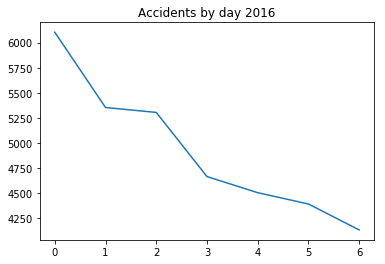

In [12]:
plt.plot(accidents_by_day.crash_count)
plt.title('Accidents by day 2016')

In [13]:
accidents_by_hour = accidents.query_to_pandas_safe("""
    SELECT COUNT(consecutive_number) AS crash_count,
           EXTRACT(HOUR FROM timestamp_of_crash) AS hour
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`
    GROUP BY hour
    ORDER BY crash_count DESC
""")
accidents_by_hour

,crash_count,hour
0,1984,18
1,1919,20
2,1913,17
3,1902,19
4,1808,16
5,1801,21
6,1731,15
7,1650,22
8,1612,0
9,1567,14


In [14]:
hit_and_run = accidents.query_to_pandas_safe("""
    SELECT registration_state_name AS state,
           COUNT(consecutive_number) AS number
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2016`
    WHERE hit_and_run = 'Yes'
    GROUP BY state
    ORDER BY number DESC
""")
hit_and_run.head(7)

,state,number
0,Unknown,929
1,California,167
2,Texas,107
3,Florida,94
4,Georgia,44
5,Illinois,43
6,North Carolina,39
